In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Subway_Data.csv')
rows, cols = df.shape
print("Number of Rows:", rows, "\nNumber of Columns:", cols)

/var/folders/8v/myv9ql5d1lg4ct7vbb0zh8000000gn/T/ipykernel_29307/2629346002.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Subway_Data.csv')


Number of Rows: 18116710 
Number of Columns: 15


In [3]:
df

,transit_timestamp,transit_mode,station_complex_id,station_complex,borough,payment_method,fare_class_category,ridership,transfers,latitude,longitude,Georeference,Counties,NYS Municipal Boundaries,New York Zip Codes
0,12/15/2022 06:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,2,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
1,06/16/2022 01:00:00 AM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,59,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
2,04/17/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,21,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
3,04/13/2022 07:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Full Fare,744,4,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
4,12/03/2022 05:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Other,85,0,40.758663,-73.981331,POINT (-73.98133087158203 40.758663177490234),2095,749,743.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18116705,06/01/2024 09:00:00 PM,subway,314,66 St-Lincoln Center (1),Manhattan,metrocard,Metrocard - Seniors & Disability,70,2,40.773440,-73.982210,POINT (-73.98221 40.77344),2095,749,750.0
18116706,06/01/2024 01:00:00 PM,subway,225,"47-50 Sts-Rockefeller Ctr (B,D,F,M)",Manhattan,metrocard,Metrocard - Seniors & Disability,25,0,40.758663,-73.981330,POINT (-73.98133 40.758663),2095,749,743.0
18116707,06/01/2024 05:00:00 PM,subway,477,72 St (Q),Manhattan,metrocard,Metrocard - Unlimited 7-Day,39,0,40.768800,-73.958430,POINT (-73.95843 40.7688),2095,749,744.0
18116708,06/01/2024 09:00:00 AM,subway,404,28 St (6),Manhattan,omny,OMNY - Full Fare,173,1,40.743070,-73.984260,POINT (-73.98426 40.74307),2095,749,739.0


In [4]:
dtype_info = df.dtypes
missing_values_info = df.isna().sum()

info_table = pd.DataFrame({
    'dtype': dtype_info,
    'missing_values': missing_values_info
})

info_table

,dtype,missing_values
transit_timestamp,object,0
transit_mode,object,0
station_complex_id,object,0
station_complex,object,0
borough,object,0
payment_method,object,0
fare_class_category,object,0
ridership,int64,0
transfers,int64,0
latitude,float64,0


In [5]:
# Check for duplicate rows
print('Number of duplicate rows before duplicates dropped:', df.duplicated().sum())

Number of duplicate rows before duplicates dropped: 0


**Separate datetime**

In [6]:
df['transit_timestamp'] = pd.to_datetime(df['transit_timestamp'])

In [7]:
df['day'] = df['transit_timestamp'].dt.dayofweek
df['month'] = df['transit_timestamp'].dt.month
df['year'] = df['transit_timestamp'].dt.year
df['hour'] = df['transit_timestamp'].dt.hour

df.drop(columns=['transit_timestamp'], inplace=True)

In [8]:
unique_values = {
    'day': sorted(df['day'].unique()),
    'month': sorted(df['month'].unique()),
    'year': sorted(df['year'].unique()),
    'hour': sorted(df['hour'].unique())
}

print(unique_values)

{'day': [0, 1, 2, 3, 4, 5, 6], 'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 'year': [2022, 2023, 2024], 'hour': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]}


**Remove features**

In [9]:
df.drop(columns=['transit_mode', 'borough', 'payment_method', 'fare_class_category', 'transfers', 'Georeference', 'Counties', 'NYS Municipal Boundaries', 'New York Zip Codes'], inplace=True)

**Station Complex data**  
Unique lat and lon values are different to number of stations

In [10]:
nunique_station_id = df['station_complex_id'].nunique()
nunique_station_id = df['station_complex'].nunique()

nunique_lat = df['latitude'].nunique()
nunique_lon = df['longitude'].nunique()

print(nunique_station_id, nunique_station_id)
print(nunique_lat, nunique_lon)

123 123
293 294


**Check case where different values**

In [11]:
df_complex = df[df['station_complex_id'] == '225']

nunique_lon_rock = df_complex['longitude'].nunique()
unique_lon_rock = df_complex['longitude'].unique()

nunique_lat_rock = df_complex['latitude'].nunique()
unique_lat_rock = df_complex['latitude'].unique()

print(nunique_lon_rock, unique_lon_rock)
print(nunique_lat_rock, unique_lat_rock)

2 [-73.98133    -73.98133087]
2 [40.758663   40.75866318]


**First round on df_complex dataset to analyse result**

In [12]:
df_complex.loc[:, 'latitude'] = df_complex['latitude'].round(5)
df_complex.loc[:, 'longitude'] = df_complex['longitude'].round(5)

nunique_lon_rock = df_complex['longitude'].nunique()
unique_lon_rock = df_complex['longitude'].unique()

nunique_lat_rock = df_complex['latitude'].nunique()
unique_lat_rock = df_complex['latitude'].unique()

print(nunique_lon_rock, unique_lon_rock)
print(nunique_lat_rock, unique_lat_rock)

1 [-73.98133]
1 [40.75866]


**Apply to main df**  
More Latitude values than Longitude, both higher value than number of station complexes

In [13]:
df.loc[:, 'latitude'] = df['latitude'].round(5)
df.loc[:, 'longitude'] = df['longitude'].round(5)

nunique_lat = df['latitude'].nunique()
nunique_lon = df['longitude'].nunique()
print(nunique_lat, nunique_lon)

155 150


**View stations with multiple lat or lon values**

In [14]:
unique_complexes = df['station_complex'].unique()

for complex_name in unique_complexes:
    complex_df = df[df['station_complex'] == complex_name]
    
    unique_latitudes = complex_df['latitude'].nunique()
    unique_longitudes = complex_df['longitude'].nunique()
    
    if unique_latitudes > 1 or unique_longitudes > 1:
        unique_latitude_values = complex_df['latitude'].unique()
        unique_longitudes_values = complex_df['longitude'].unique()
        
        print(f'{complex_name}: Latitude: {unique_latitude_values}')
        print(f'{complex_name}: Longitude: {unique_longitudes_values}')
        print('\n')


East Broadway (F): Latitude: [40.71371 40.71372]
East Broadway (F): Longitude: [-73.99017]


28 St (1): Latitude: [40.74721 40.74722]
28 St (1): Longitude: [-73.99336]


28 St (R,W): Latitude: [40.7455  40.74549]
28 St (R,W): Longitude: [-73.98869]


Broad St (J,Z): Latitude: [40.70647]
Broad St (J,Z): Longitude: [-74.01106 -74.01105]


Fulton St (A,C,J,Z,2,3,4,5): Latitude: [40.71037 40.7102  40.70942]
Fulton St (A,C,J,Z,2,3,4,5): Longitude: [-74.00657 -74.00769 -74.00758 -74.00951]


168 St (A,C,1): Latitude: [40.84072 40.84056]
168 St (A,C,1): Longitude: [-73.93956 -73.94013]


Canal St (1): Latitude: [40.72286 40.72285]
Canal St (1): Longitude: [-74.00628]


Bryant Pk (B,D,F,M)/5 Av (7): Latitude: [40.75422 40.75382]
Bryant Pk (B,D,F,M)/5 Av (7): Longitude: [-73.98196 -73.98457]


RI Tramway (Roosevelt): Latitude: [40.75734]
RI Tramway (Roosevelt): Longitude: [-73.95412 -73.95411]


Canal St (J,N,Q,R,W,Z,6): Latitude: [40.71953 40.71809 40.7188 ]
Canal St (J,N,Q,R,W,Z,6): Longitude

**Multiple entries likely due to different entrances/exits to subway complex. Will take mode coordinates**

In [15]:
for complex_name in unique_complexes:
    complex_df = df[df['station_complex'] == complex_name]
    
    most_common_lat = complex_df['latitude'].mode()[0]
    most_common_lon = complex_df['longitude'].mode()[0]
    
    df.loc[df['station_complex'] == complex_name, 'latitude'] = most_common_lat
    df.loc[df['station_complex'] == complex_name, 'longitude'] = most_common_lon
    

In [16]:
df.to_csv('Clean_Subway_Data.csv', index=False)

In [17]:
df.dtypes

station_complex_id     object
station_complex        object
ridership               int64
latitude              float64
longitude             float64
day                     int32
month                   int32
year                    int32
hour                    int32
dtype: object

In [18]:
df.drop(columns=['station_complex'], inplace=True)

**Group data by location and time**

In [19]:
grouped_df = df.groupby(['station_complex_id', 'latitude', 'longitude', 'year', 'month', 'day', 'hour'])['ridership'].sum().reset_index()

In [ ]:
grouped_df

**Final data checks**

In [31]:
print('Number of duplicate rows:', grouped_df.duplicated().sum())
print('Number of missing values:\n', grouped_df.isna().sum())

Number of duplicate rows: 0
Missing values
 station_complex_id    0
latitude              0
longitude             0
year                  0
month                 0
day                   0
hour                  0
ridership             0
dtype: int64


In [22]:
datetime_features = ['day', 'month', 'year', 'hour']

**Counts**

In [23]:
for feature in datetime_features:
    counts = grouped_df.groupby(feature, observed=True)['ridership'].sum()
    print(f"Counts for {feature}:")
    print(counts)
    print()

Counts for station_complex_id:
station_complex_id
8         2807766
9          212153
10        1554418
13        1989703
14        3405037
           ...   
635       8743840
8         5063558
9        17186296
TRAM1     3350399
TRAM2     3026815
Name: ridership, Length: 244, dtype: int64

Counts for day:
day
0    203497290
1    241521888
2    248983252
3    246685097
4    221230825
5    156158811
6    125026494
Name: ridership, dtype: int64

Counts for month:
month
1     100174704
2     130586002
3     158102621
4     154309254
5     164457401
6     113306734
7      95388865
8      98269519
9     103559185
10    111799118
11    106269536
12    106880718
Name: ridership, dtype: int64

Counts for year:
year
2022    512608116
2023    643210369
2024    287285172
Name: ridership, dtype: int64

Counts for hour:
hour
0      16358088
1       6771575
2       3572470
3       2321788
4       2929533
5       8949821
6      25045875
7      56815020
8      85335874
9      64883480
10     53372521


**Correlation Plots**

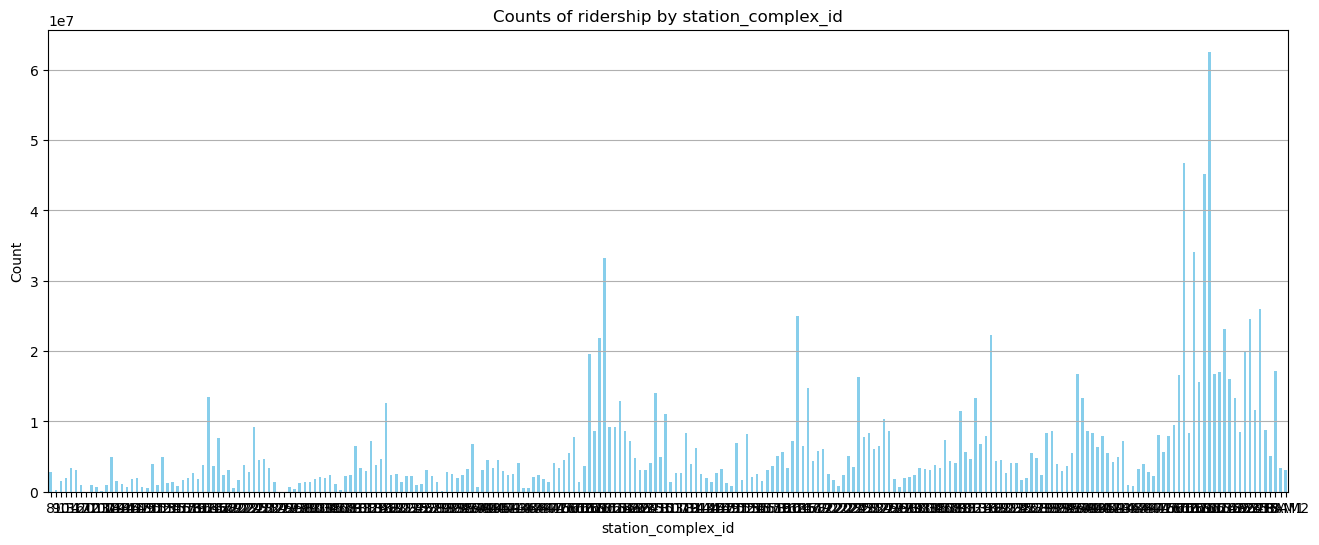

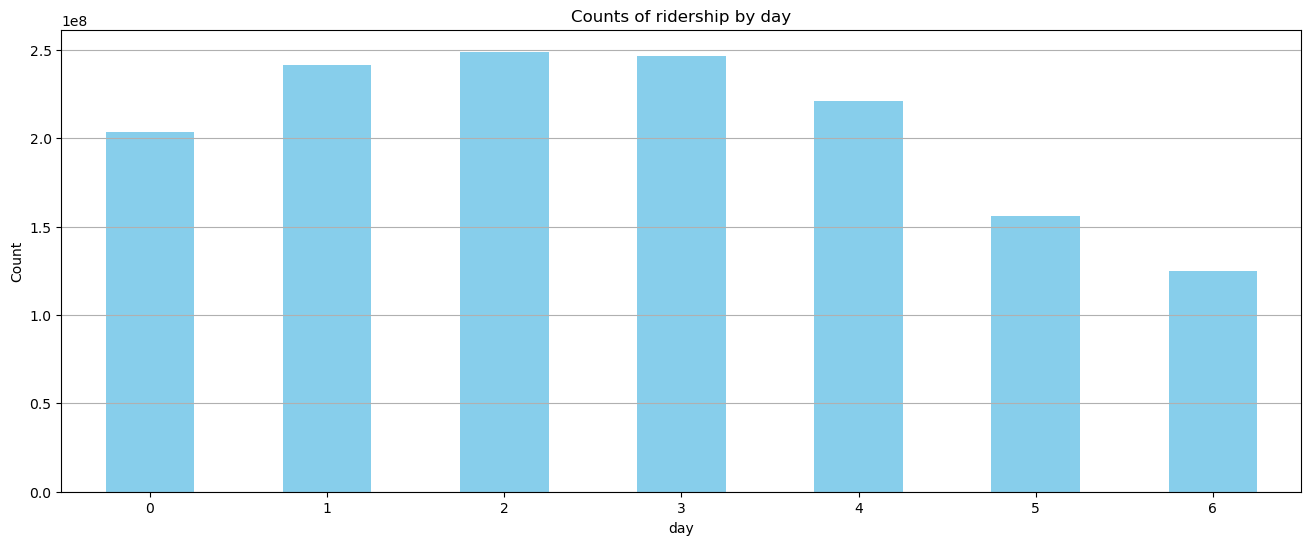

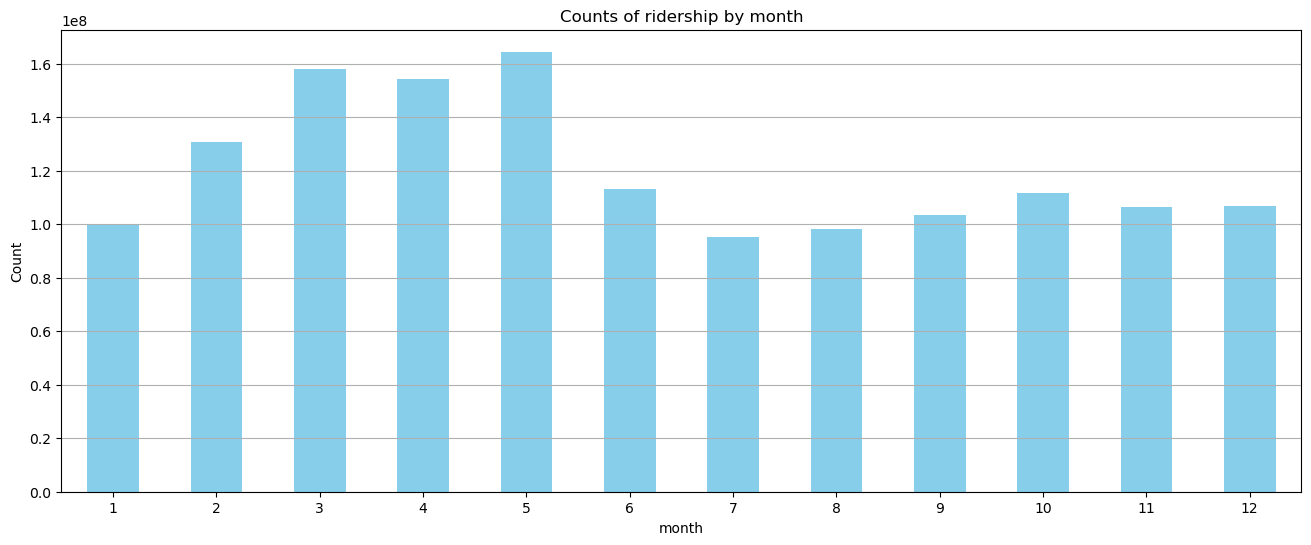

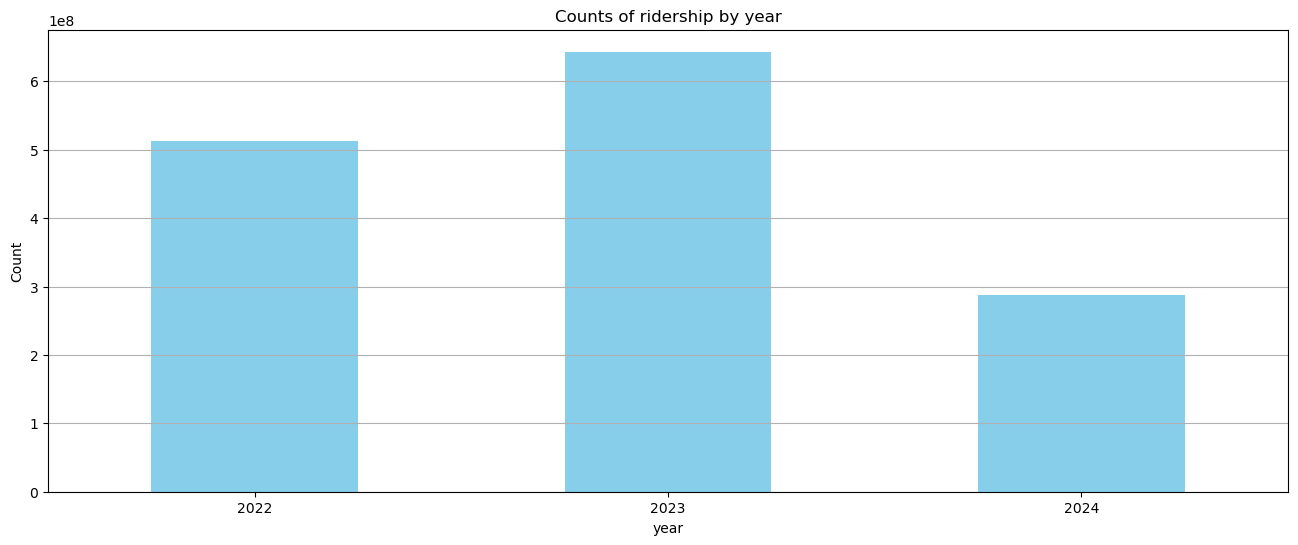

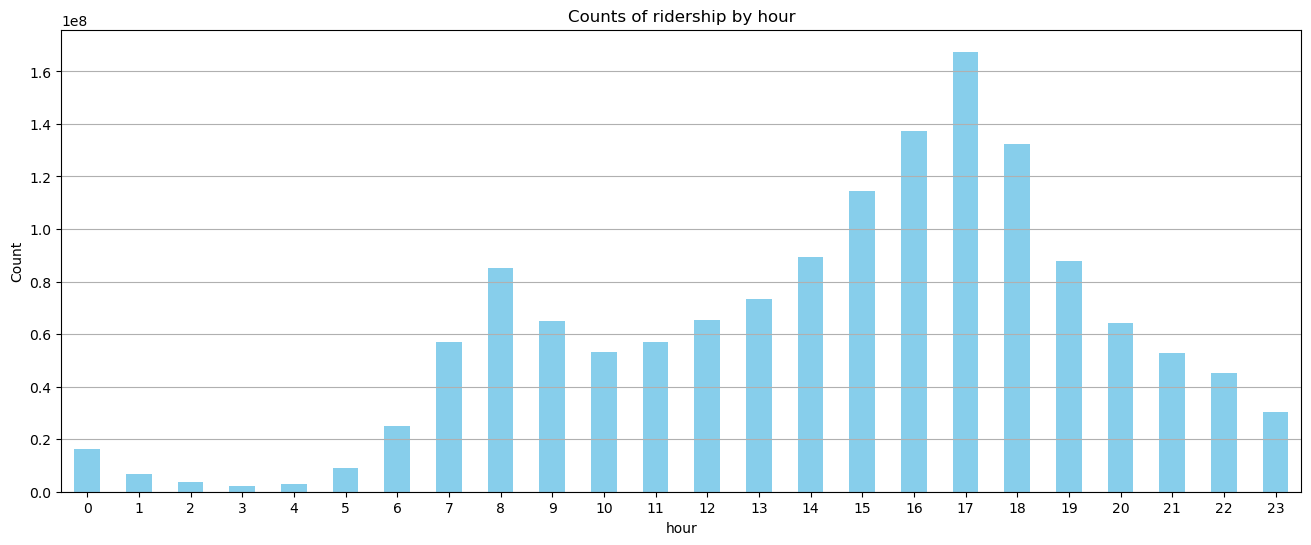

In [27]:
for feature in datetime_features:
    plt.figure(figsize=(16, 6))
    counts = grouped_df.groupby(feature, observed=True)['ridership'].sum()
    counts.plot(kind='bar', color='skyblue')
    plt.title(f'Counts of ridership by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()

In [32]:
grouped_df.to_csv('Subway_Data_Final.csv', index=False)